In [78]:
import numpy as np 
from sklearn.metrics import mean_squared_log_error
X = np.array(sorted([20*x for x in np.random.rand(120,1)]))
Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el 
in X])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
index_argsort = np.argsort(X_train.reshape(72,))
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False) # fit_intercept наличие свободной переменной
model.fit(X_train, Y_train) # Передаём тренировочную часть

LinearRegression(fit_intercept=False)

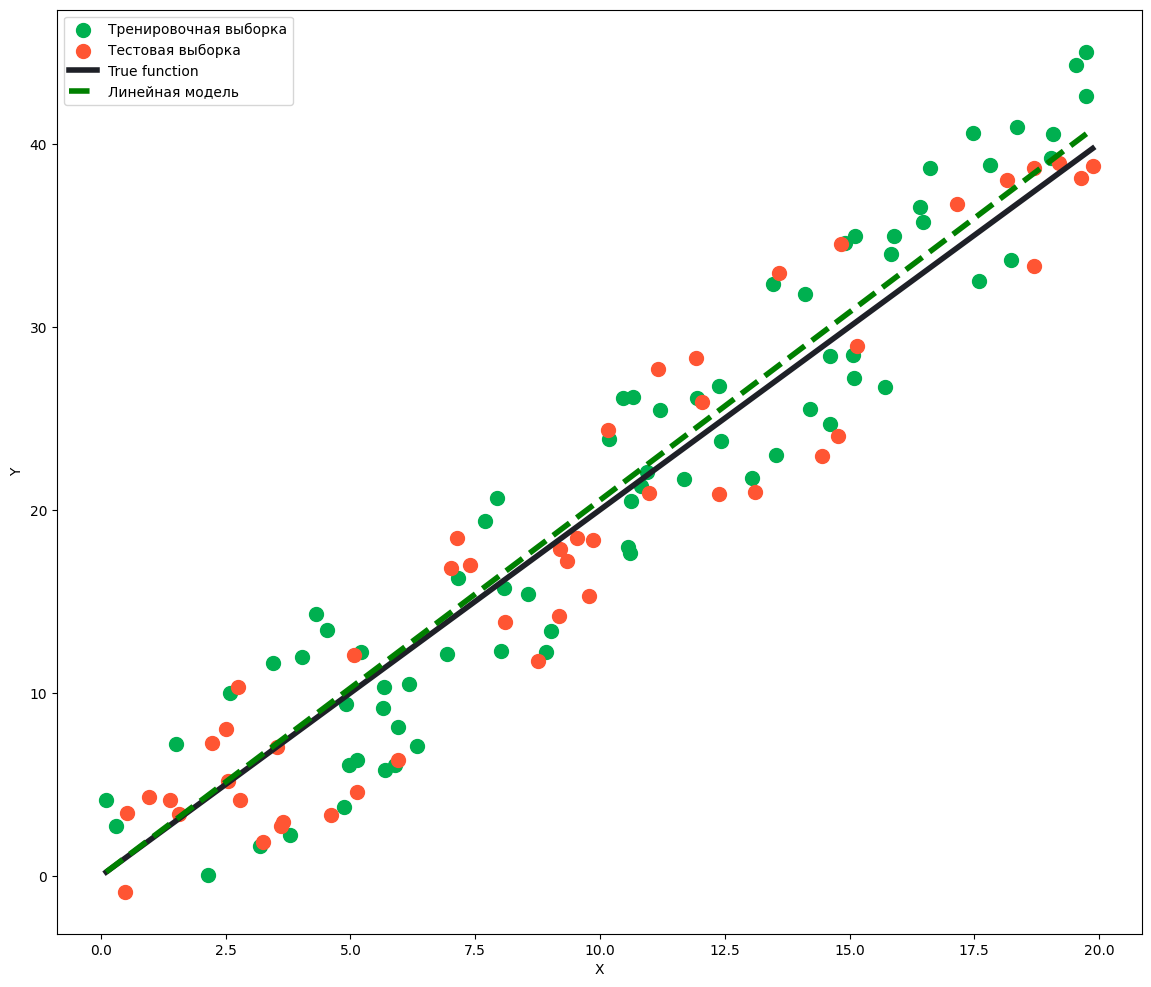

In [79]:
import matplotlib.pyplot as plt
# Создадим полотно вызвав объект figure
fig = plt.figure() 
fig.set_size_inches(14, 12)
# Отметим точки
plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
# Построим идеальное распределение 
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], 
 model.predict(X_train[index_argsort]),
 '--g', linewidth=4)
# Установим легенды и подпишем оси
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
 'Линейная модель'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
Y_pred = model.predict(X_test)

# Вычислим MSLE
msle = mean_squared_log_error(Y_test, Y_pred)
print("MSLE: ", msle)

In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Обучаем модель на логарифмированных данных
model.fit(X_train, np.log(Y_train + 1))

# Предсказываем значения для тестовой выборки
Y_pred_log = model.predict(X_test)

# Вычисляем MSE между логарифмированными истинными и предсказанными значениями
mse = mean_squared_error(np.log(Y_test + 1), Y_pred_log)
print("MSE: ", mse)

MSE:  0.8540171286640151
